# Random Forest Classification

## Importing the libraries

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [96]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [97]:
X = dataset.iloc[:, :-1].values
X[:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [98]:
y = dataset.iloc[:, -1].values
y[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [99]:
X.shape, y.shape 

((400, 2), (400,))

## Splitting the dataset into the Training set and Test set

In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.19, random_state = 0)
X_train[:5], X_test[:5]

(array([[    42,  79000],
        [    40,  60000],
        [    53,  34000],
        [    47, 107000],
        [    58, 144000]], dtype=int64),
 array([[   30, 87000],
        [   38, 50000],
        [   35, 75000],
        [   30, 79000],
        [   35, 50000]], dtype=int64))

In [101]:
y_train[:5], y_test[:5]

(array([0, 0, 1, 1, 1], dtype=int64), array([0, 0, 0, 0, 0], dtype=int64))

## Feature Scaling

In [102]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[:5], X_test[:5]

(array([[ 0.3594316 ,  0.26346116],
        [ 0.1646894 , -0.28838195],
        [ 1.43051373, -1.04353566],
        [ 0.84628712,  1.07670362],
        [ 1.91736925,  2.15134545]]),
 array([[-0.80902163,  0.49581615],
        [-0.03005281, -0.57882568],
        [-0.32216612,  0.14728366],
        [-0.80902163,  0.26346116],
        [-0.32216612, -0.57882568]]))

## Training the Random Forest Classification model on the Training set

In [103]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=27, criterion= 'entropy', random_state=0)
classifier.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=27, random_state=0)

## Predicting a new result

In [104]:
classifier.predict(sc.transform([[30,87000]]))

array([0], dtype=int64)

## Predicting the Test set results

In [105]:
y_pred = classifier.predict(X_test)
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),axis=1)[:20]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 0],
       [0, 0],
       [1, 1],
       [0, 0]], dtype=int64)

## Making the Confusion Matrix

0.9736842105263158

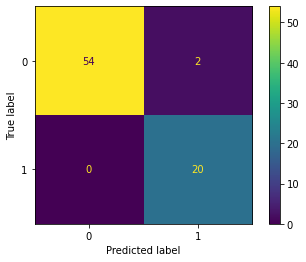

In [106]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test,y_pred)

## Visualising the Training set results

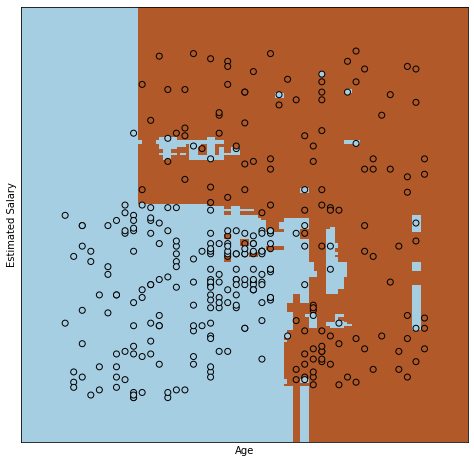

In [107]:
# Plot the decision boundary. For that, we will assign a color to each

# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 8), facecolor='white')
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
#plt.figure(facecolor='red')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Visualising the Test set results

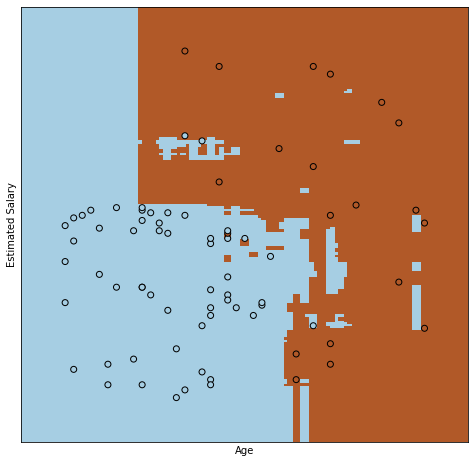

In [108]:
# Plot the decision boundary. For that, we will assign a color to each

# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_test[:, 0].min() - .5, X_test[:, 0].max() + .5
y_min, y_max = X_test[:, 1].min() - .5, X_test[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(8, 8), facecolor='white')
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k', cmap=plt.cm.Paired)
#plt.figure(facecolor='red')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# Optimise hyper-parameters

In [109]:
'''
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
criterion = ['gini', 'entropy']
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
min_samples_split = [2, 4, 8, 16]
min_samples_leaf = [2, 4, 8, 16]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators,
                'criterion': criterion,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
'''

"\nn_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]\ncriterion = ['gini', 'entropy']\nmax_features = ['auto', 'sqrt', 'log2']\nmax_depth = [int(x) for x in np.linspace(10, 100, num = 10)]\nmin_samples_split = [2, 4, 8, 16]\nmin_samples_leaf = [2, 4, 8, 16]\nbootstrap = [True, False]\n\nparam_grid = {'n_estimators': n_estimators,\n                'criterion': criterion,\n                'max_features': max_features,\n                'max_depth': max_depth,\n                'min_samples_split': min_samples_split,\n                'min_samples_leaf': min_samples_leaf,\n                'bootstrap': bootstrap}\n"

In [110]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf_classifier = RandomForestClassifier()

# `n_jobs` means parallel jobs to run -> -1 means using all processors
grid_search = GridSearchCV(rf_classifier, param_grid, cv = 3, verbose = 1, n_jobs = -1)

grid_fit = grid_search.fit(X_train, y_train)
grid_fit.best_params_
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import GridSearchCV\n\nrf_classifier = RandomForestClassifier()\n\n# `n_jobs` means parallel jobs to run -> -1 means using all processors\ngrid_search = GridSearchCV(rf_classifier, param_grid, cv = 3, verbose = 1, n_jobs = -1)\n\ngrid_fit = grid_search.fit(X_train, y_train)\ngrid_fit.best_params_\n'

In [111]:
grid_classifier = RandomForestClassifier(n_estimators=10, 
                                        criterion='gini',
                                        bootstrap=True,
                                        max_depth=10,
                                        max_features='sqrt',
                                        min_samples_leaf=8,
                                        min_samples_split=2,
                                        random_state = 0)
grid_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=8,
                       n_estimators=10, random_state=0)

0.9736842105263158

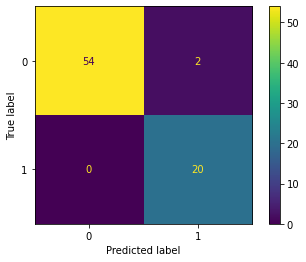

In [112]:
cm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot()
accuracy_score(y_test,y_pred)